# Customer Segmentation using K-Means Clustering

Content:
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

Problem Statement:
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In [1]:
#importing modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Data Collection & Analysis

In [2]:
customer_data=pd.read_csv('Downloads/Mall_Customers.csv')
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
customer_data.shape

(200, 5)

In [4]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

 Since there are no null values in the dataset, no further treatment to improve the data was necessary.

In [7]:
#choosing the annual and spending score columns
X=customer_data.iloc[:,[3,4]]

In [8]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


#wcss--- within clusters sum of sqaure

C:\Users\akshay0909\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


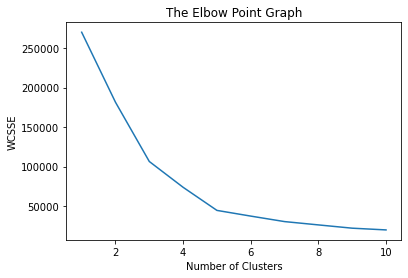

In [9]:
# finding wcss value for different number of clusters

wcsse= []

for i in range(1,11):
  kmeans= KMeans(n_clusters=i,random_state=3)#create a model object
  kmeans.fit(X)
  wcsse.append(kmeans.inertia_)#finding the wsse for that value of k

# plot an elbow graph

plt.plot(range(1,11), wcsse)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSSE')
plt.show()

Optimum Number of Clusters = 5

# Training the k-Means Clustering Model

In [10]:
kmeans = KMeans(n_clusters=5, random_state=3)

# return a label for each data point based on their cluster
Y_pred= kmeans.fit_predict(X)

print(Y_pred)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 4 1 0 1 4 1 4 1 0 1 4 1 4 1 4 1 4 1 0 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]


5 Clusters - 0, 1, 2, 3, 4

In [11]:
kmeans.n_iter_

3

In [12]:
customer_data['Clusters']=Y_pred
customer_data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


# Visualizing all the Clusters

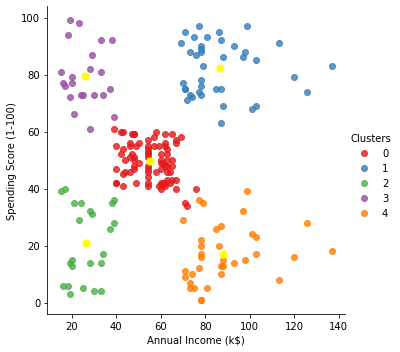

In [13]:
sns.lmplot(data=customer_data, x='Annual Income (k$)',y='Spending Score (1-100)',fit_reg=False, #no regression line,
            hue='Clusters',palette='Set1')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           s=50,c='yellow')
plt.show()

In [14]:
customer_data['Clusters']=customer_data.Clusters.map({0:'standard',1:'Target',2:'Sensible',3:'careless',4:'careful'})
customer_data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,Sensible
1,2,Male,21,15,81,careless
2,3,Female,20,16,6,Sensible
3,4,Female,23,16,77,careless
4,5,Female,31,17,40,Sensible


In [17]:
new_data=customer_data[customer_data['Clusters']=='Target']
new_data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
123,124,Male,39,69,91,Target
125,126,Female,31,70,77,Target
127,128,Male,40,71,95,Target
129,130,Male,38,71,75,Target
131,132,Male,39,71,75,Target


In [19]:
new_data.shape

(39, 6)

In [20]:
new_data.to_excel(r'TargetCustomers.xlsx',index=True)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
123,124,Male,39,69,91,Target
125,126,Female,31,70,77,Target
127,128,Male,40,71,95,Target
129,130,Male,38,71,75,Target
131,132,Male,39,71,75,Target
133,134,Female,31,72,71,Target
135,136,Female,29,73,88,Target
137,138,Male,32,73,73,Target
139,140,Female,35,74,72,Target
141,142,Male,32,75,93,Target
